In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA

Example from:
https://analyticsdefined.com/implementing-principal-component-analysis/

In [3]:
sales = pd.io.parsers.read_csv("Wholesale-customers-data.csv")
sales = sales.drop(["Channel", "Region"], axis=1)
sales.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Get the list of product types

In [4]:
# Get all the headers
header_labels = sales.columns.values.tolist()
header_labels

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

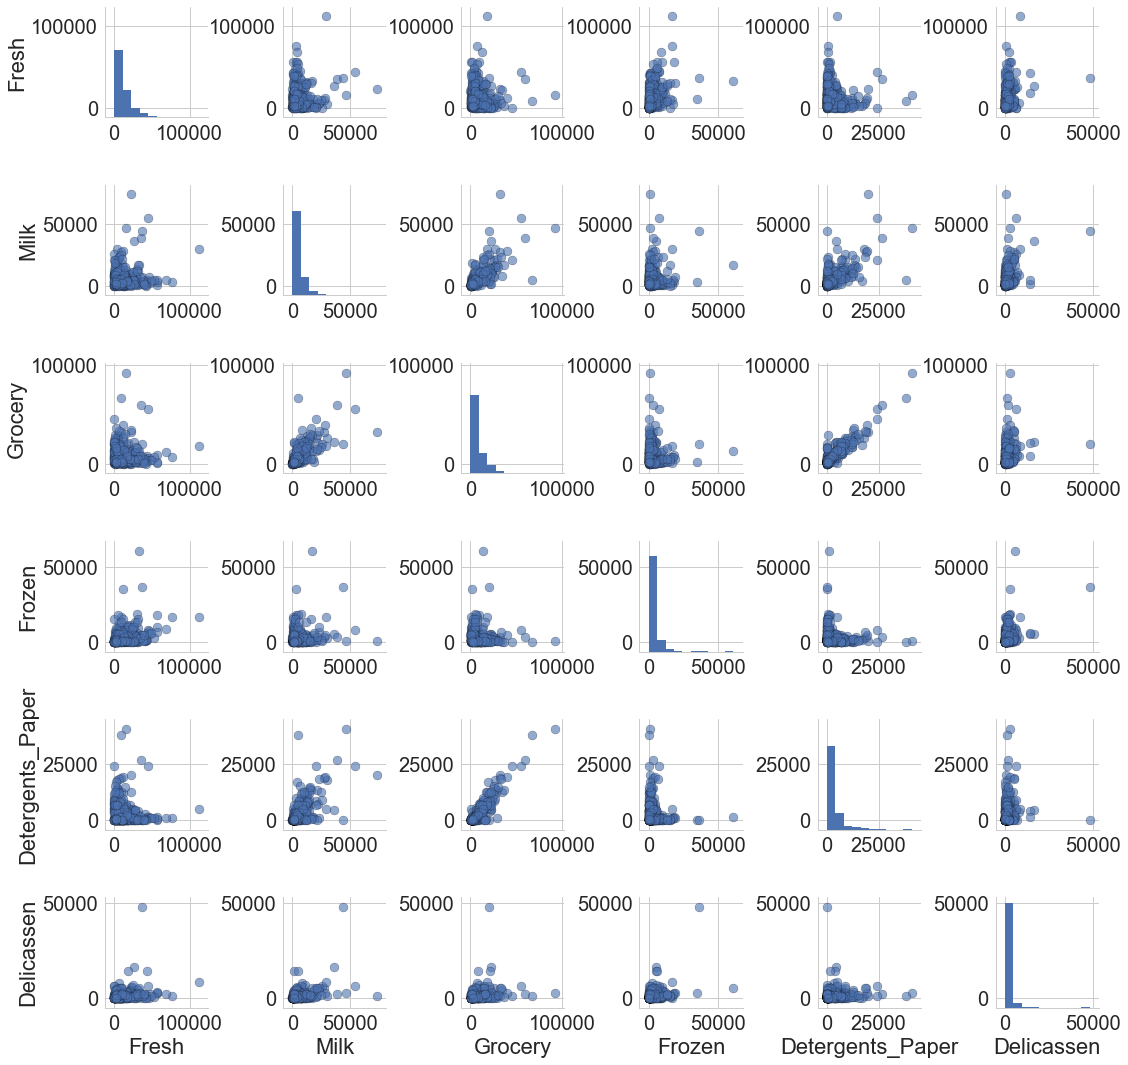

In [5]:
sns.pairplot(sales[header_labels], plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

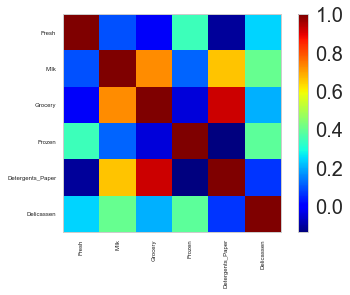

In [14]:
corr_matrix = sales.corr()
# plot correlation matrix
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.grid('off')
ax1.set_xticks(np.arange(len(header_labels)))
ax1.set_yticks(np.arange(len(header_labels)))
ax1.set_xticklabels(header_labels,fontsize=6,rotation=90)
ax1.set_yticklabels(header_labels,fontsize=6)
fig.colorbar(cax)

### This is when we want to try PCA!

In [15]:
X = (sales - sales.mean())/sales.std()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

variances = S**2

V = Vt.T

[44.082892881128075, 28.376399526616918, 12.334412896786478, 9.3955037529714858, 4.7612724006886813, 1.0495185418083766]


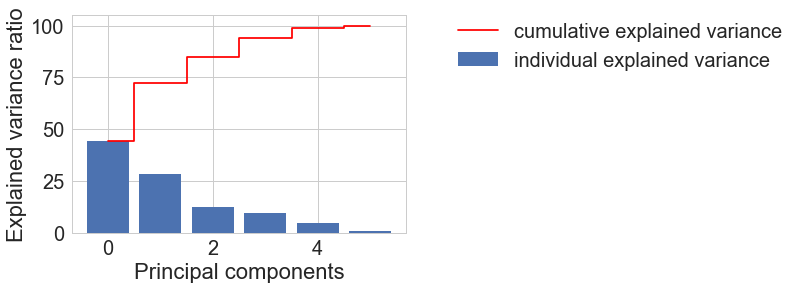

In [16]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [17]:
Xstar=X@V
reduced_data = pd.DataFrame(Xstar[:,:2], columns = ['pc1', 'pc2'])

In [9]:
def plot_arrow(v,scale,text_pos,text_label):
    plt.arrow(0, 0, scale*v[0], scale*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    plt.text(v[0]*text_pos, v[1]*text_pos, text_label, color='black', ha='center', va='center', fontsize=18)


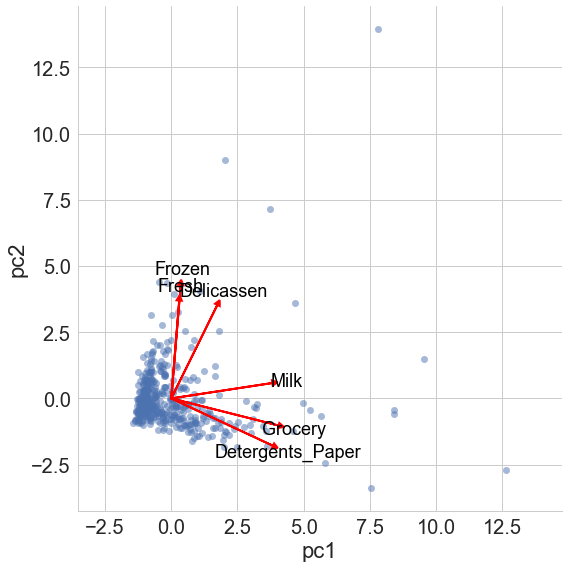

In [10]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',reduced_data, fit_reg=False, size=8,scatter_kws={'alpha':0.5})
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i,label in enumerate(header_labels):
    plot_arrow(V[i,:],7,8,label)

The biplot above shows that the products milk, grocery, and detergents_paper are aligned towards the principal component 1 or dimension 1. Whereas the fresh and frozen products are aligned towards the principal component 2 or dimension 2. These seem intuitive as we have already seen their relationship in the scatter plot above where there seems to be a linear relationship between the group of products milk, grocery and detergents_paper and fresh and frozen products. Hence principal component analysis reduced the overall dimension of the dataset from six variables to two variables by also removed multicollinearity in the data by aligning the related variables into their respective principal components or dimensions